# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
df = pd.read_csv('Bank_data.csv')
df.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:
df = df.drop('Unnamed: 0',axis = 1)
df

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [4]:
df.describe()

,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


In [5]:
df.columns

Index(['interest_rate', 'credit', 'march', 'may', 'previous', 'duration', 'y'], dtype='object')

In [6]:
df['y'] = df['y'].map({'yes':1,'no':0})

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [7]:
y = df['y']
X = df['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [8]:
import statsmodels.api as sm

In [12]:
Xc = sm.add_constant(X)
reg_log = sm.Logit(y,Xc)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                  0.2121
Time:                        17:33:58   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

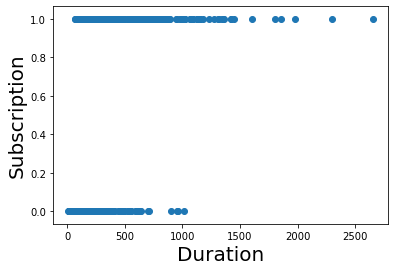

In [13]:
plt.scatter(X,y,color = 'C0')
plt.xlabel('Duration',fontsize = 20)
plt.ylabel('Subscription',fontsize = 20)
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [14]:
estimators = ['interest_rate','credit','march','previous','duration']
y = df['y']
X1 = df[estimators]

In [15]:
X1c = sm.add_constant(X1)
reg_logit = sm.Logit(y,X1c)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


C:\Users\Avish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Apr 2020   Pseudo R-squ.:                  0.5143
Time:                        17:37:36   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [16]:
def confusion_matrix(df,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(df)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [17]:
confusion_matrix(X1c,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [19]:
# We have to load data our model has never seen before.
df = pd.read_csv('Bank_data_testing.csv')
# Removes the index column thata comes with the data
df = df.drop(['Unnamed: 0'], axis = 1)

In [20]:
# Coverting the outcome variable into 1s and 0s again. 
df['y'] = df['y'].map({'yes':1, 'no':0})
df

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [22]:
y_test = df['y']
# We already declared a list called 'estimators' that holds all relevant estimators for our model. 
X1_test = df[estimators]
X_test = sm.add_constant(X1_test)

C:\Users\Avish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
confusion_matrix(X_test, y_test, results_logit)

(array([[93., 18.],
        [13., 98.]]), 0.8603603603603603)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [24]:
confusion_matrix(X1c,y, results_logit)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

Looking at the test acccuracy we see a number which is a tiny but lower: 86.04%, compared to 86.29% for train accuracy.

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.

Note that when you run the regression, you may get different numbers than us!

